<a href="https://colab.research.google.com/github/pirsquared/Colaboratory/blob/master/CountStateChange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [0]:
import pandas as pd
import numpy as np
from timeit import timeit

pd.set_option(
    'display.notebook_repr_html', False,
    'expand_frame_repr', False,
    'display.max_colwidth', 50
)

%matplotlib inline

# [how-to-count-the-number-of-state-change-in-pandas](https://stackoverflow.com/a/53190603/2336654)

In [0]:
def pir_xor(df):
  v = df.values
  return pd.Series((v[1:] ^ v[:-1]).sum(0), df.columns)

def pir_diff1(df):
  v = df.values
  return pd.Series(np.abs(np.diff(v, axis=0)).sum(0), df.columns)

def pir_diff2(df):
  v = df.values
  return pd.Series(np.diff(v.astype(np.bool), axis=0).sum(0), df.columns)

def cold(df):
  return df.ne(df.shift(-1)).sum(0) - 1

def jez(df):
  return df.rolling(2).apply(lambda x: x[0] != x[-1]).sum().astype(int)

def naga(df):
  return df.diff().abs().sum().astype(int)


In [0]:
np.random.seed([3, 1415])

idx = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
col = 'pir_xor pir_diff1 pir_diff2 cold jez naga'.split()
res = pd.DataFrame(np.nan, idx, col)

for i in idx:
  df = pd.DataFrame(np.random.choice([0, 1], size=(i, 3)), columns=[*'abc'])
  for j in col:
    stmt = f"{j}(df)"
    setp = f"from __main__ import {j}, df"
    res.at[i, j] = timeit(stmt, setp, number=100)

In [9]:
res.div(res.min(1), 0)

        pir_xor  pir_diff1  pir_diff2       cold         jez      naga
10      1.06203   1.119769   1.000000  21.217555   16.768532  6.601518
30      1.00000   1.075406   1.115743  23.229013   18.844025  7.212369
100     1.00000   1.134082   1.174973  22.673289   21.478068  7.519898
300     1.00000   1.119153   1.166782  21.725495   26.293712  7.215490
1000    1.00000   1.106267   1.167786  18.394462   37.925160  6.284253
3000    1.00000   1.118554   1.342192  16.053097   64.953310  5.594610
10000   1.00000   1.163557   1.511631  12.008129  106.466636  4.503359
30000   1.00000   1.249835   1.431120   7.826387  118.380227  3.621455
100000  1.00000   1.275272   1.528840   6.690012  131.912349  3.150155
300000  1.00000   1.279373   1.528238   6.301007  140.667427  3.190868

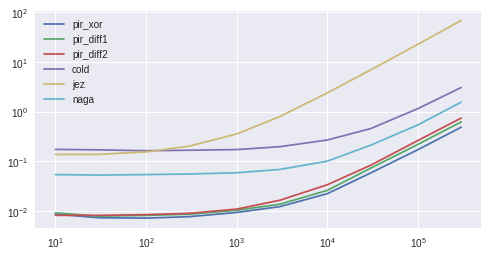

In [11]:
res.plot(loglog=True, figsize=(8, 4))